## LEAD SCORING CASE STUDY

In [169]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [105]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [106]:
# check for duplicate 
df.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [107]:
# check for duplicate 
df.duplicated(subset = ['Lead Number'], keep = False).sum()

0

## EDA

In [108]:
# Prospect ID and Lead number are the columns that have all unique values i.e. they are identifier variables and can be dropped
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

C:\Users\Chitra Rajendran\AppData\Local\Temp\ipykernel_25004\2615665418.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


In [109]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [110]:
# There are many categorical variable that has value "Select" which is equal to null so fill them with NA
df = df.replace('Select', np.nan)

In [111]:
df = df.replace('select', np.nan)

In [112]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [113]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [114]:
#dropping the column with unique values

In [115]:
df= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [116]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [117]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [118]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [119]:
# % of null value
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [120]:
# Drop columns with more the 40 % as null values

In [121]:
df = df.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education',],axis =1)

In [122]:
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [123]:
object_columns = df.select_dtypes(include='object').columns.tolist()

In [124]:
object_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [125]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [126]:
## Filling the null value in the categorical variable

In [127]:
lead_src=df['Lead Source'].mode()[0]

In [128]:
lead_src

'Google'

In [129]:
df['Lead Source'] = df['Lead Source'].fillna(lead_src)

In [130]:
lst_ac=df['Last Activity'].mode()[0]
lst_ac

'Email Opened'

In [131]:
df['Last Activity'] = df['Last Activity'].fillna(lst_ac)

In [132]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [133]:
df['Specialization']=df['Specialization'].fillna('Unavailable')

In [134]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [135]:
df['City']=df['City'].fillna('Unavailable')

In [136]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [137]:
df['What is your current occupation']=df['What is your current occupation'].fillna('Unavailable')

In [138]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [139]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Not Provided')

In [140]:
df['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [141]:
df['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [142]:
df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [143]:
df['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [144]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [145]:
df['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [146]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [147]:
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [148]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [149]:
country=df['Country'].mode()[0]

In [150]:
df['Country']=df['Country'].fillna(country)

In [151]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [152]:
df['Tags']=df['Tags'].fillna('Unavailable')

In [153]:
# Handled all the categorical data and now to check other data if any null is present

In [154]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                       

In [175]:
#Analysis of categorical data

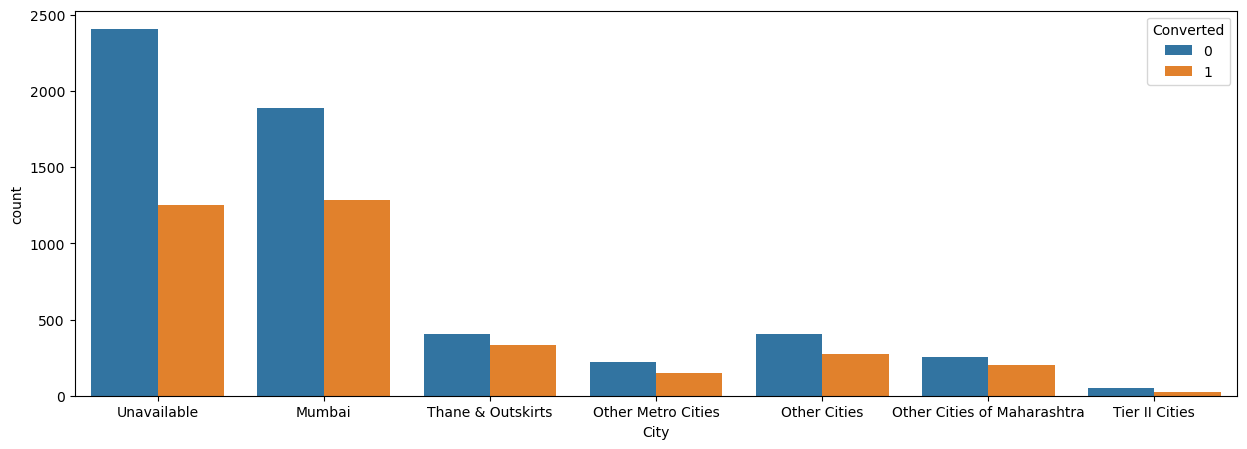

In [189]:
plt.figure(figsize=(15,5))
sns.countplot(x="City", hue="Converted", data=df)
plt.show()

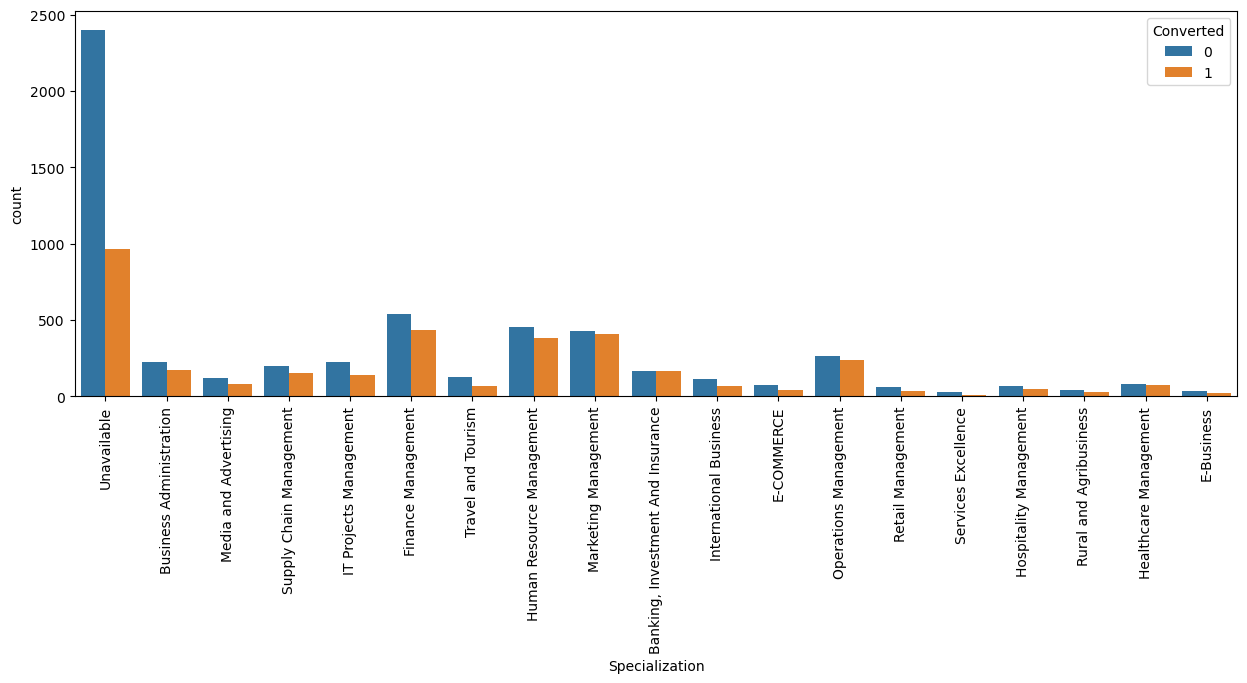

In [194]:
plt.figure(figsize=(15,5))
sns.countplot(x="Specialization", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

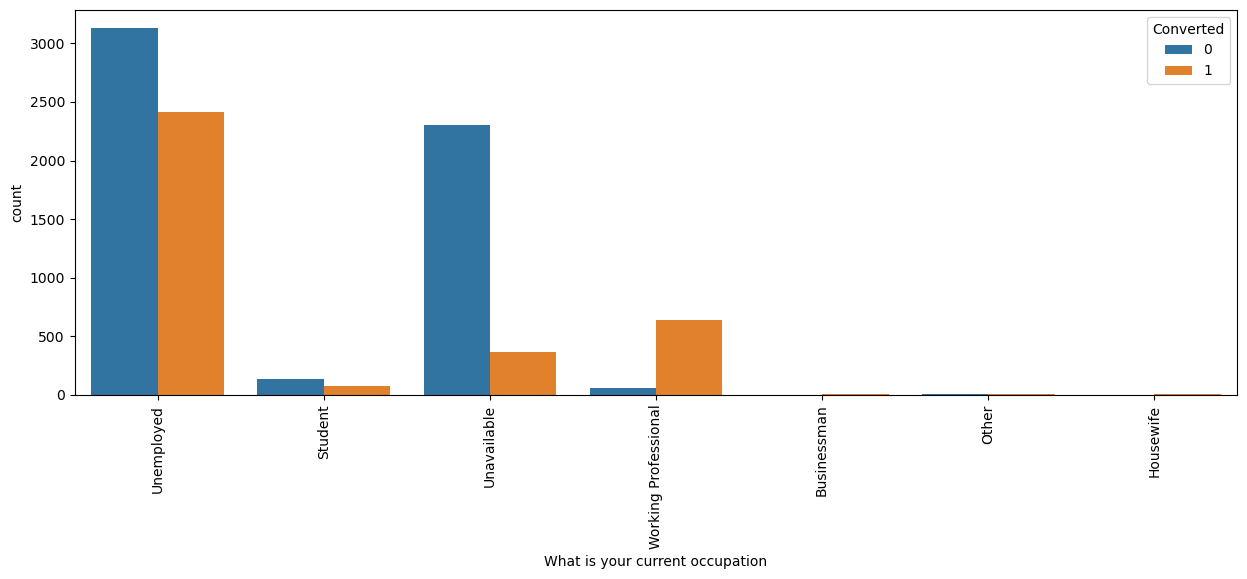

In [195]:
plt.figure(figsize=(15,5))
sns.countplot(x="What is your current occupation", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

In [197]:
df['What is your current occupation'] = df['What is your current occupation'].replace('Unavailable', 'Unemployed')

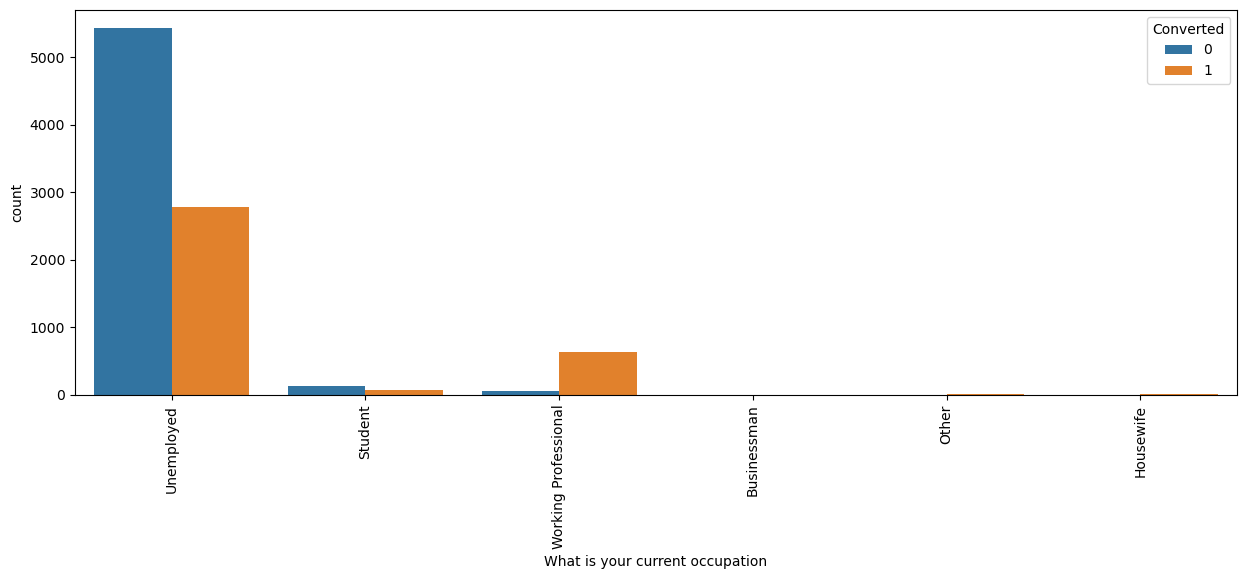

In [198]:
plt.figure(figsize=(15,5))
sns.countplot(x="What is your current occupation", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

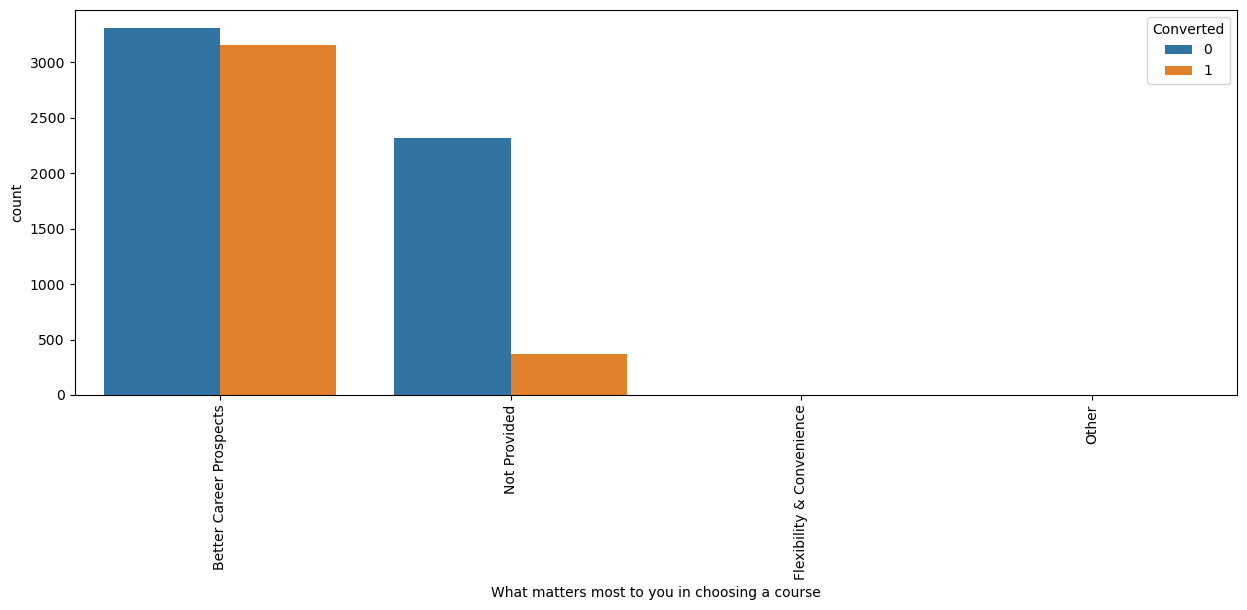

In [199]:
plt.figure(figsize=(15,5))
sns.countplot(x="What matters most to you in choosing a course", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

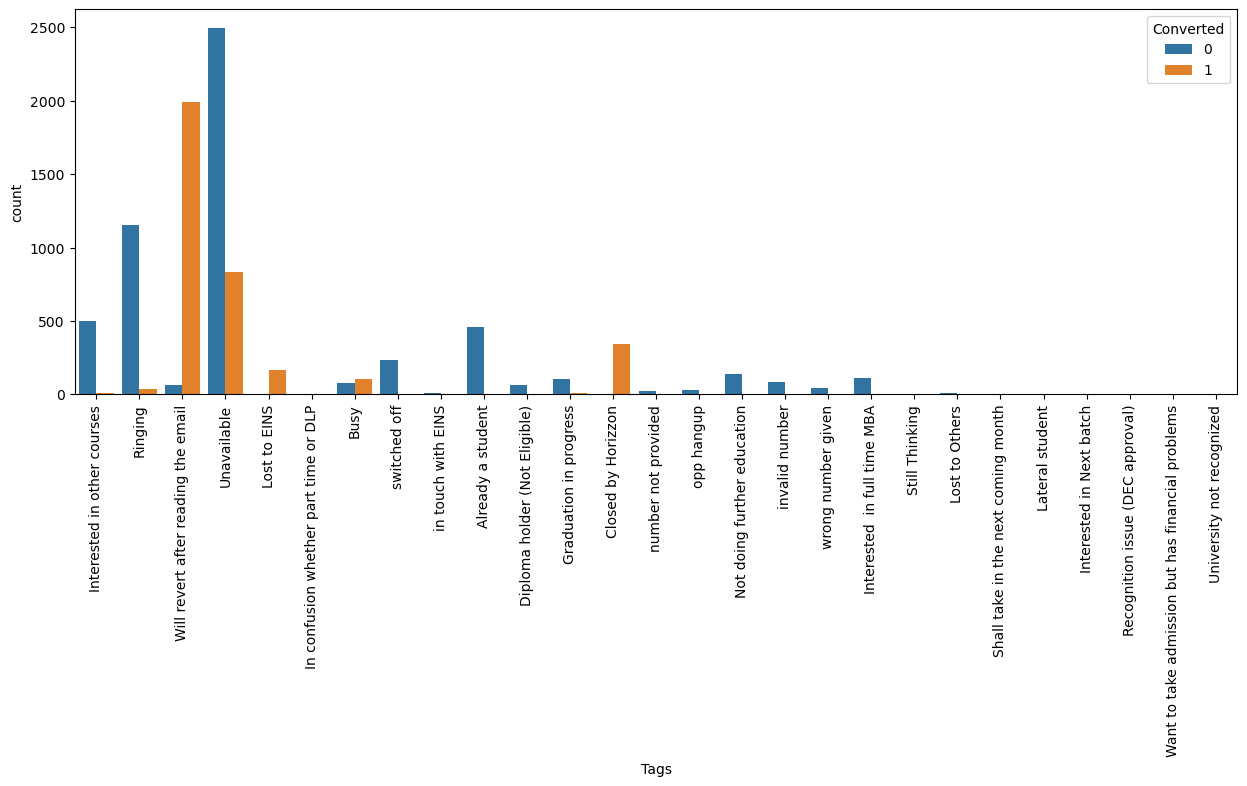

In [201]:
plt.figure(figsize=(15,5))
sns.countplot(x="Tags", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

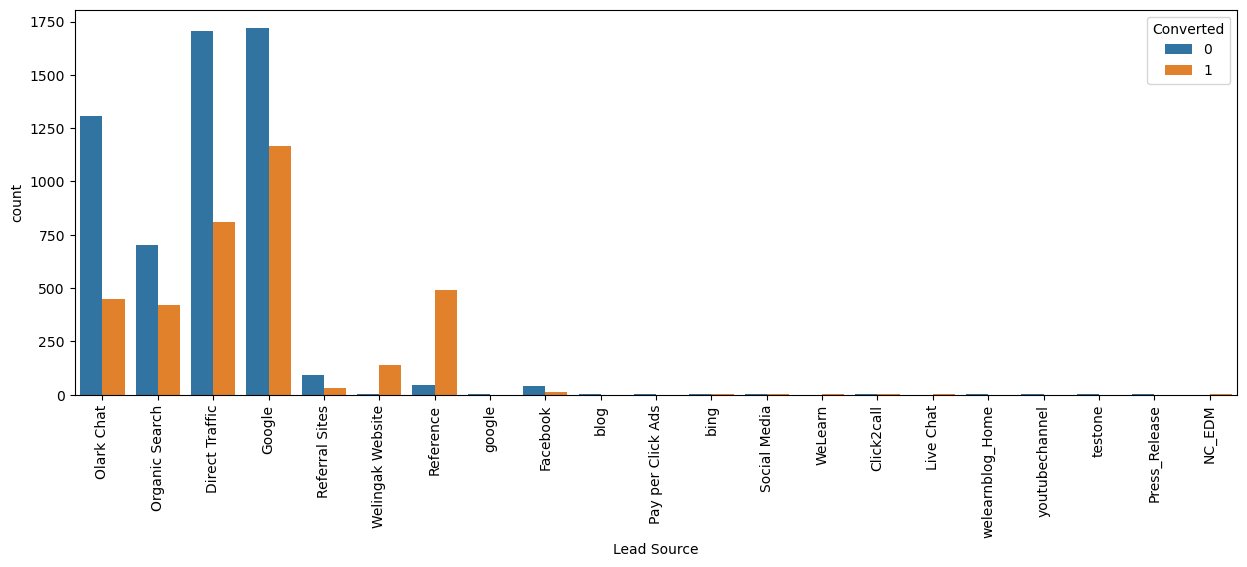

In [202]:
plt.figure(figsize=(15,5))
sns.countplot(x="Lead Source", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

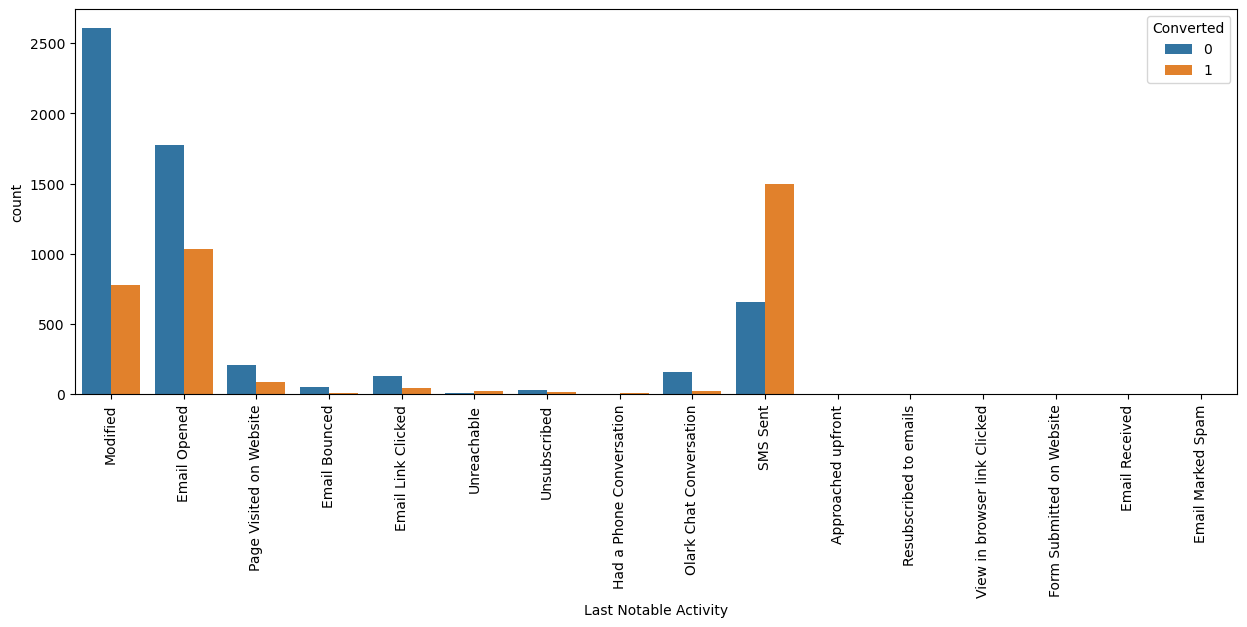

In [235]:
plt.figure(figsize=(15,5))
sns.countplot(x="Last Notable Activity", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Numeric data analysis and filling the NULL values

In [155]:
tot_visit=df['TotalVisits'].median()

In [156]:
df['TotalVisits']=df['TotalVisits'].fillna(tot_visit)

In [157]:
per_visit_view=df['Page Views Per Visit'].median()

In [158]:
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(per_visit_view)

In [159]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Tags                           

In [161]:
df.shape

(9240, 23)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [163]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [164]:
# To Check the outlier of the value in the column

In [165]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


In [166]:
numeric_col = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [167]:
numeric_col.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


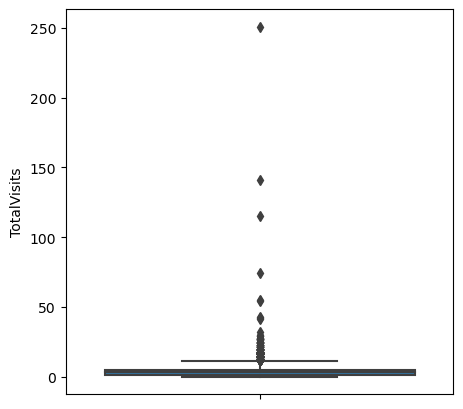

In [170]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df['TotalVisits'])
plt.show()

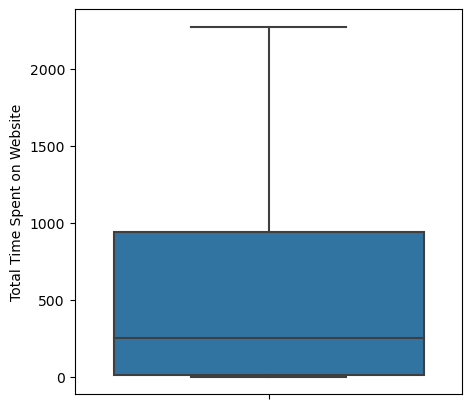

In [171]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

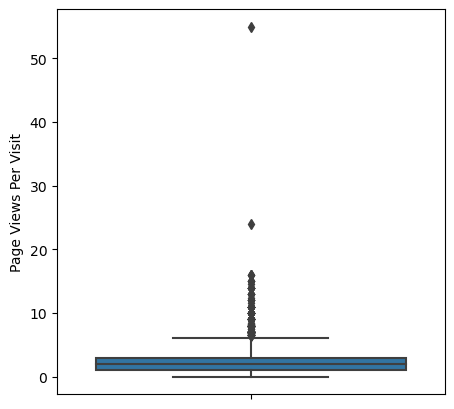

In [172]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

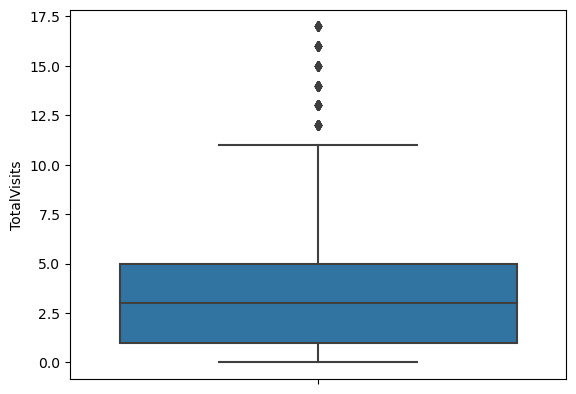

In [174]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

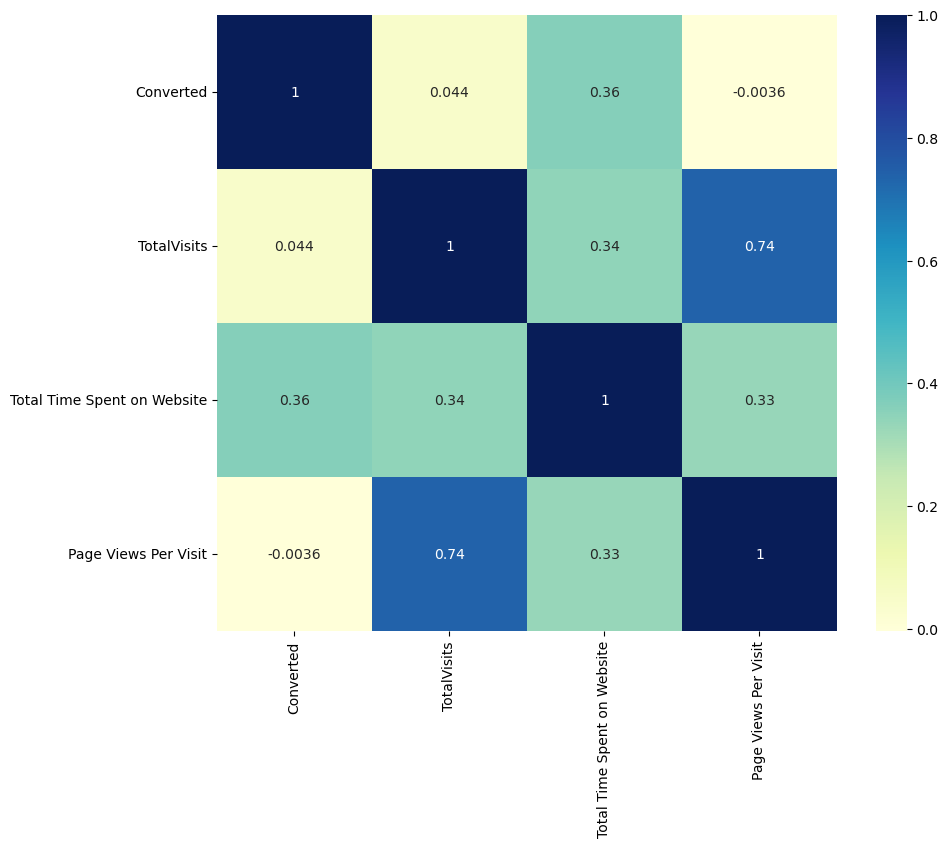

In [239]:
# Corelation between numeric data
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

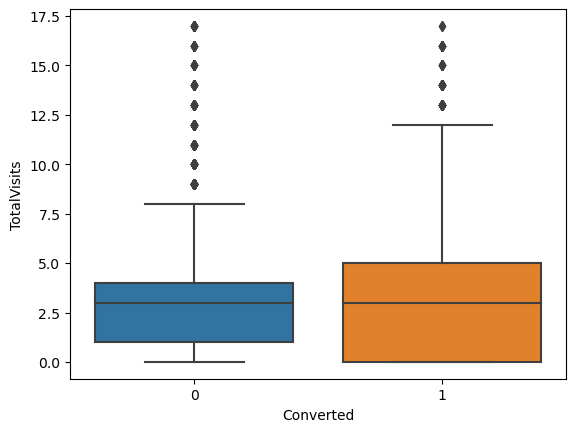

In [240]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Median for converted and not converted leads are the close.
Nothing conclusive can be said on the basis of Total Visits

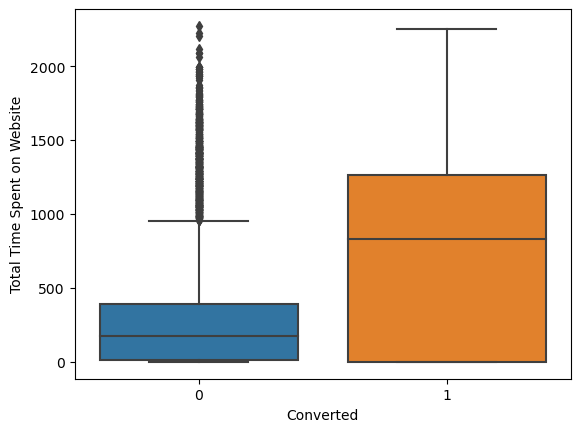

In [242]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

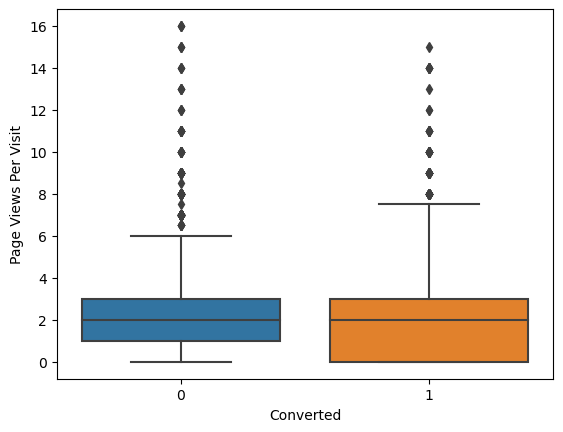

In [243]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

In [203]:
# Yes/No valued Columns

In [204]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,Interested in other courses,Unavailable,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,Unavailable,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened


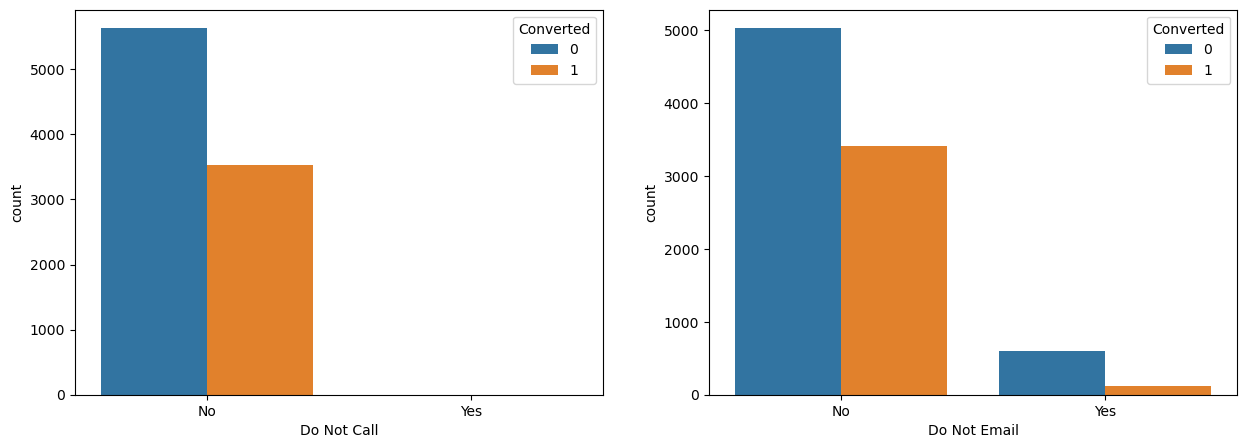

In [221]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x="Do Not Call", hue="Converted", data=df)
plt.subplot(1, 2, 2)
sns.countplot(x="Do Not Email", hue="Converted", data=df)
plt.show()

In [227]:
df['Do Not Call'].value_counts(dropna=False)

No     9155
Yes       2
Name: Do Not Call, dtype: int64

In [228]:
col_to_dropp='Do Not Call'
df = df.drop(col_to_dropp, axis=1)

In [229]:
df['X Education Forums'].value_counts(dropna=False)

No    9157
Name: X Education Forums, dtype: int64

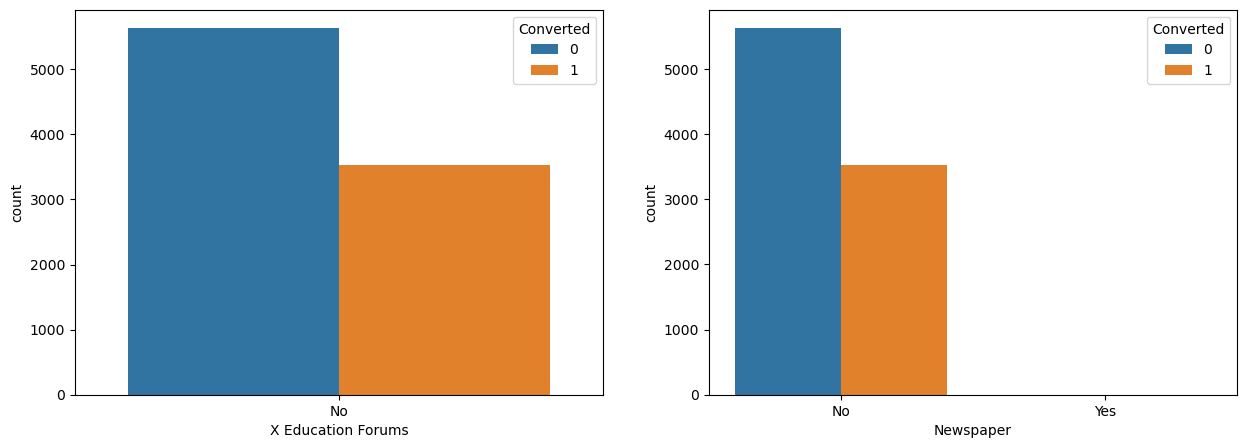

In [222]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x="X Education Forums", hue="Converted", data=df)
plt.subplot(1, 2, 2)
sns.countplot(x="Newspaper", hue="Converted", data=df)
plt.show()

In [230]:
col_to_dropp1='X Education Forums'
df = df.drop(col_to_dropp1, axis=1)

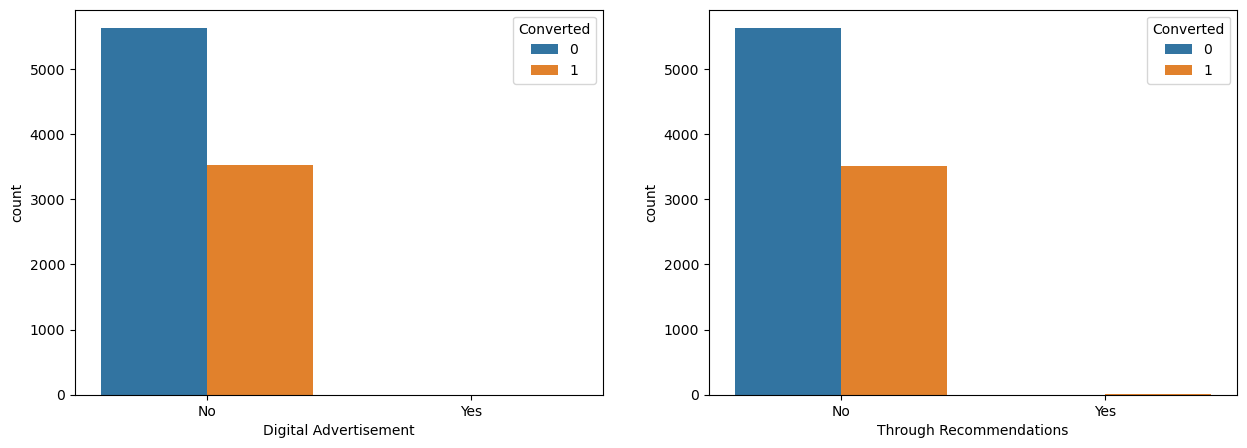

In [223]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x="Digital Advertisement", hue="Converted", data=df)
plt.subplot(1, 2, 2)
sns.countplot(x="Through Recommendations", hue="Converted", data=df)
plt.show()

<Axes: xlabel='A free copy of Mastering The Interview', ylabel='count'>

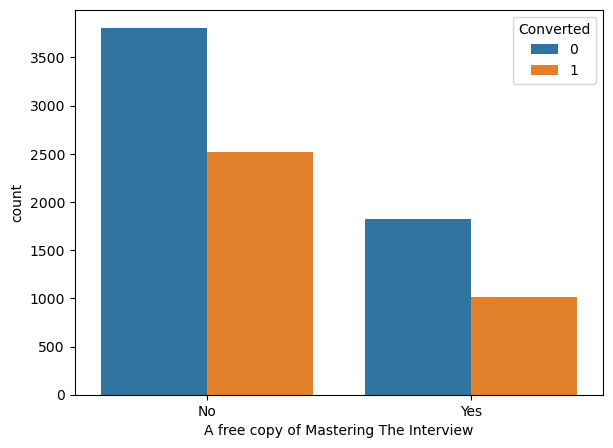

In [225]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=df)

In [231]:
col_list_to_drop=['Through Recommendations','Digital Advertisement','Newspaper']

In [232]:
df = df.drop(col_list_to_drop, axis=1)

In [233]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Unavailable,Unemployed,Better Career Prospects,No,No,Interested in other courses,Unavailable,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unavailable,Unemployed,Better Career Prospects,No,No,Ringing,Unavailable,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unavailable,Unemployed,Better Career Prospects,No,No,Will revert after reading the email,Mumbai,No,Modified


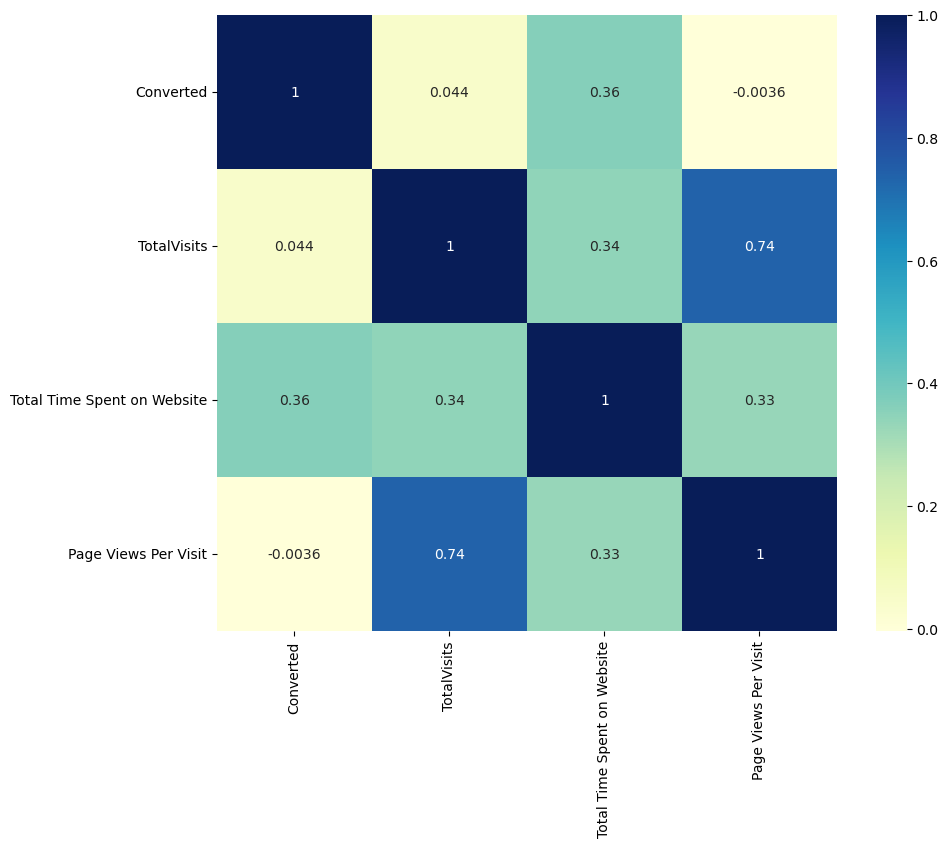

## Dummy Variable Creation:

In [244]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [245]:
df[cat_cols].head()

,Lead Origin,Lead Source,Do Not Email,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,India,Unavailable,Unemployed,Better Career Prospects,No,No,Interested in other courses,Unavailable,No,Modified
1,API,Organic Search,No,Email Opened,India,Unavailable,Unemployed,Better Career Prospects,No,No,Ringing,Unavailable,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,India,Unavailable,Unemployed,Better Career Prospects,No,No,Will revert after reading the email,Mumbai,No,Modified


In [246]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email','Search','Newspaper Article']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [247]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unavailable,Unemployed,Better Career Prospects,0,0,Interested in other courses,Unavailable,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unavailable,Unemployed,Better Career Prospects,0,0,Ringing,Unavailable,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unavailable,Unemployed,Better Career Prospects,0,0,Will revert after reading the email,Mumbai,0,Modified


In [249]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df = pd.concat([df,dummy],1)

In [250]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unavailable
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unavailable,...,0,0,1,0,0,0,0,0,0,1
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unavailable,...,0,0,1,0,0,0,0,0,0,1
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unavailable,...,0,0,1,0,0,0,0,0,0,0


In [255]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unavailable
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [256]:
dummy = dummy.drop(['Specialization_Unavailable'], 1)
df = pd.concat([df, dummy], axis = 1)

In [258]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')

In [259]:
dummy.head()

,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,...,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
df['Lead Source'].value_counts()

Google               2886
Direct Traffic       2512
Olark Chat           1753
Organic Search       1125
Reference             533
Welingak Website      142
Referral Sites        123
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [262]:
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [263]:
df['Lead Source'] = df['Lead Source'].replace('welearnblog_Home','WeLearn')

In [265]:
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')

In [266]:
df['Lead Source'].value_counts(dropna=False)

Google               2891
Direct Traffic       2512
Olark Chat           1753
Organic Search       1125
Reference             533
Welingak Website      142
Referral Sites        123
Social Media           57
bing                    6
Click2call              4
Press_Release           2
WeLearn                 2
Live Chat               2
testone                 1
Pay per Click Ads       1
youtubechannel          1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [267]:
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','WeLearn','Live Chat','testone','Pay per Click Ads','youtubechannel','blog','NC_EDM'],'Others')

In [268]:
df['Lead Source'].value_counts(dropna=False)

Google              2891
Direct Traffic      2512
Olark Chat          1753
Organic Search      1125
Reference            533
Welingak Website     142
Referral Sites       123
Social Media          57
Others                21
Name: Lead Source, dtype: int64

In [269]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')

In [271]:
dummy.head(3)

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0


In [272]:
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [273]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unavailable,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unavailable,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,0,0,1,0,0,0,0,0,0,0


In [275]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')

In [276]:
dummy

,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9237,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9238,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [277]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3518
SMS Sent                        2729
Olark Chat Conversation          971
Page Visited on Website          602
Converted to Lead                428
Email Bounced                    325
Email Link Clicked               266
Form Submitted on Website        115
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          29
Approached upfront                 9
View in browser link Clicked       5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [279]:
df['Last Activity'] = df['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Marked Spam','Email Received','View in browser link Clicked','Approached upfront'],'Others')

In [280]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3518
SMS Sent                     2729
Olark Chat Conversation       971
Page Visited on Website       602
Converted to Lead             428
Email Bounced                 325
Email Link Clicked            266
Form Submitted on Website     115
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       29
Others                         20
Name: Last Activity, dtype: int64

In [281]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')

In [282]:
dummy.head()

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [283]:
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [284]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unavailable,...,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unavailable,...,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unavailable,...,0,0,0,0,0,0,0,0,0,0


In [285]:
to_drop_cols=['Last Activity','Lead Source','Specialization','Lead Origin','What is your current occupation','City']

In [286]:
df = df.drop(to_drop_cols, 1)

In [288]:
df['Tags'].value_counts(dropna=False)

Unavailable                                          3328
Will revert after reading the email                  2054
Ringing                                              1187
Interested in other courses                           510
Already a student                                     464
Closed by Horizzon                                    349
switched off                                          239
Busy                                                  186
Lost to EINS                                          173
Not doing further education                           138
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [289]:
df['Tags'] = df['Tags'].replace(['Recognition issue (DEC approval)','University not recognized','Shall take in the next coming month','Lateral student','Want to take admission but has financial problems','Interested in Next batch','In confusion whether part time or DLP','Still Thinking','Lost to Others'],'Others')

In [290]:
df['Tags'].value_counts(dropna=False)

Unavailable                            3328
Will revert after reading the email    2054
Ringing                                1187
Interested in other courses             510
Already a student                       464
Closed by Horizzon                      349
switched off                            239
Busy                                    186
Lost to EINS                            173
Not doing further education             138
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
Others                                   36
opp hangup                               33
number not provided                      27
in touch with EINS                       12
Name: Tags, dtype: int64

In [291]:
df['Tags'] = df['Tags'].replace('wrong number given','invalid number')

In [292]:
df['Tags'] = df['Tags'].replace(['opp hangup','number not provided','in touch with EINS','Diploma holder (Not Eligible)'],'Others')

In [295]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')

In [296]:
dummy

,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Unavailable,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9237,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9238,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [297]:
dummy = dummy.drop(['Tags_Unavailable'], 1)
df = pd.concat([df, dummy], axis = 1)

In [298]:
df.shape

(9157, 77)

In [300]:
df = df.drop(['Tags'], 1)

In [301]:
df.select_dtypes(include=['object']).columns

Index(['Country', 'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [302]:
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3390
Email Opened                    2807
SMS Sent                        2159
Page Visited on Website          289
Olark Chat Conversation          182
Email Link Clicked               172
Email Bounced                     59
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [303]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Others')

In [309]:
df['Last Notable Activity'].value_counts(dropna=False)

Modified                   3390
Email Opened               2807
SMS Sent                   2159
Page Visited on Website     289
Olark Chat Conversation     182
Email Link Clicked          172
Email Bounced                59
Unsubscribed                 47
Unreachable                  32
Others                       20
Name: Last Notable Activity, dtype: int64

In [310]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [313]:
df = df.drop(['Last Notable Activity'], 1)

In [306]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Country']= label_encoder.fit_transform(df['Country'])

In [314]:
df.select_dtypes(include=['object']).columns

Index(['What matters most to you in choosing a course'], dtype='object')

In [315]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6464
Not Provided                 2690
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [316]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(['Flexibility & Convenience'],'Others')

In [317]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(['Other'],'Others')

In [318]:
dummy = pd.get_dummies(df['What matters most to you in choosing a course'], prefix  = 'What matters most to you in choosing a course')
dummy = dummy.drop(['What matters most to you in choosing a course_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [321]:
df = df.drop(['What matters most to you in choosing a course'], 1)

In [322]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Data columns (total 85 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Do Not Email                                                           9157 non-null   int64  
 1   Converted                                                              9157 non-null   int64  
 2   TotalVisits                                                            9157 non-null   float64
 3   Total Time Spent on Website                                            9157 non-null   int64  
 4   Page Views Per Visit                                                   9157 non-null   float64
 5   Country                                                                9157 non-null   int32  
 6   Search                                                                 9157 non-null   i

In [324]:
df.head(3)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,Newspaper Article,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Not Provided
0,0,0,0.0,0,0.0,12,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,12,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,12,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0


## Logistic Regression

In [326]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']
X=df.drop('Converted', axis=1)

In [327]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [328]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6409 entries, 6490 to 5686
Data columns (total 84 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Do Not Email                                                           6409 non-null   int64  
 1   TotalVisits                                                            6409 non-null   float64
 2   Total Time Spent on Website                                            6409 non-null   int64  
 3   Page Views Per Visit                                                   6409 non-null   float64
 4   Country                                                                6409 non-null   int32  
 5   Search                                                                 6409 non-null   int64  
 6   Newspaper Article                                                      6409 non-null 

In [329]:
## Scaling the numeric Data

In [330]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,Newspaper Article,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Not Provided
6490,-0.298706,-0.744597,-0.831303,-0.647913,12,-0.039532,-0.012492,-0.673022,0,0,...,0,0,1,0,0,0,0,0,1,0
4026,3.347778,-0.069711,-0.578290,-0.405762,12,-0.039532,-0.012492,-0.673022,0,0,...,0,0,0,0,0,1,0,0,1,0
6453,-0.298706,2.967279,-0.130933,1.773595,12,-0.039532,-0.012492,1.485836,1,0,...,0,0,0,0,0,1,0,0,1,0
8949,-0.298706,0.942619,-0.594791,-0.405762,12,-0.039532,-0.012492,-0.673022,1,0,...,0,1,0,0,0,0,0,0,1,0
6467,-0.298706,2.629836,-0.767133,4.195103,12,-0.039532,-0.012492,1.485836,1,0,...,0,0,0,0,0,1,0,0,1,0


In [331]:
import statsmodels.api as sm

In [334]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [335]:
rfe = RFE(estimator=logreg,n_features_to_select=83) 

In [336]:
rfe = rfe.fit(X_train, y_train)

In [337]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Country', True, 1),
 ('Search', True, 1),
 ('Newspaper Article', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Other Cities of Maharashtra', True, 1),
 ('City_Other Metro Cities', True, 1),
 ('City_Thane & Outskirts', True, 1),
 ('City_Tier II Cities', True, 1),
 ('City_Unavailable', True, 1),
 ('Specialization_Banking, Investment And Ins

In [338]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Search', 'Newspaper Article',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'City_Unavailable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitali

In [339]:
X_train_rfe = X_train[col]

In [341]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_rfe)

In [349]:
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           83
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.4
Date:                Wed, 09 Aug 2023   Deviance:                       2172.8
Time:                        18:48:47   Pearson chi2:                 1.34e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6305
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [344]:
# Drop column with large p value

In [350]:
#COLUMN workingday HAS A VERY HIGH VIF SO WE DROP IT 
X_train_sm=X_train_sm.drop(['const','Newspaper Article'],axis=1)

In [351]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           81
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.4
Date:                Wed, 09 Aug 2023   Deviance:                       2172.9
Time:                        18:49:11   Pearson chi2:                 1.34e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6305
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -0.2355      0.088     -2.680      0.007      -0.408      -0.063
TotalVisits                                                               0.2559      0.094      2.735      0.006       0.073       0.439
Total Time Spent on Website                                               1.0675      0.069     15.562      0.000       0.933       1.202
Page Views Per Visit                                                     -0.1297      0.096     -1.344      0.179      -0.319       0.059
Country                                                                   0.0341      0.019      1.776      0.076      -0.004       0.072
Search                                                                   -0.0766      0.106     -0.720      0.472      -0.285       0.132
A free copy of Mastering The Interview                                   -0.1641      0.092     -1.785      0.074      -0.344       0.016
Lead Origin_Landing Page Submission                                      -0.1919      0.268     -0.717      0.474      -0.717       0.333
Lead Origin_Lead Add Form                                                 2.0328      1.010      2.013      0.044       0.054       4.012
Lead Origin_Lead Import                                                   1.0159      1.646      0.617      0.537      -2.209       4.241
Lead Origin_Quick Add Form                                               21.9559   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
What is your current occupation_Housewife                                20.5135   2.77e+04      0.001      0.999   -5.42e+04    5.43e+04
What is your current occupation_Other                                     0.6044      2.266      0.267      0.790      -3.837       5.045
What is your current occupation_Student                                   0.9231      1.668      0.553      0.580      -2.346       4.192
What is your current occupation_Unemployed                                0.8507      1.560      0.545      0.586      -2.207       3.909
What is your current occupation_Working Professional                      1.2745      1.592      0.801      0.423      -1.845       4.394
City_Other Cities                                                         0.0625      0.240      0.261      0.794      -0.408       0.533
City_Other Cities of Maharashtra                                         -0.4931      0.313     -1.575      0.115      -1.107       0.121
City_Other Metro Cities                                                  -0.2028      0.335     -0.605      0.545      -0.860       0.455
City_Thane & Outskirts                         

In [352]:
X_train_sm=X_train_sm.drop(['Lead Origin_Quick Add Form'],axis=1)

In [353]:
X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           81
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.6
Date:                Wed, 09 Aug 2023   Deviance:                       2173.2
Time:                        18:49:30   Pearson chi2:                 1.33e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6305
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -16.0444   5.53e+04     -0.000      1.000   -1.08e+05    1.08e+05
Do Not Email                                                             -0.2347      0.088     -2.671      0.008      -0.407      -0.062
TotalVisits                                                               0.2560      0.094      2.735      0.006       0.073       0.439
Total Time Spent on Website                                               1.0691      0.069     15.603      0.000       0.935       1.203
Page Views Per Visit                                                     -0.1298      0.097     -1.345      0.179      -0.319       0.059
Country                                                                   0.0340      0.019      1.775      0.076      -0.004       0.072
Search                                                                   -0.0765      0.107     -0.717      0.473      -0.286       0.133
A free copy of Mastering The Interview                                   -0.1652      0.092     -1.799      0.072      -0.345       0.015
Lead Origin_Landing Page Submission                                      -0.2016      0.267     -0.755      0.450      -0.725       0.322
Lead Origin_Lead Add Form                                                 2.0205      1.010      2.000      0.046       0.040       4.001
Lead Origin_Lead Import                                                   1.0051      1.646      0.611      0.541      -2.220       4.230
What is your current occupation_Housewife                                20.5214   2.77e+04      0.001      0.999   -5.42e+04    5.42e+04
What is your current occupation_Other                                     0.6105      2.266      0.269      0.788      -3.832       5.053
What is your current occupation_Student                                   0.9308      1.669      0.558      0.577      -2.341       4.202
What is your current occupation_Unemployed                                0.8586      1.561      0.550      0.582      -2.202       3.919
What is your current occupation_Working Professional                      1.2830      1.593      0.805      0.421      -1.839       4.405
City_Other Cities                                                         0.0628      0.240      0.262      0.793      -0.407       0.533
City_Other Cities of Maharashtra                                         -0.4920      0.313     -1.571      0.116      -1.106       0.122
City_Other Metro Cities                                                  -0.1857      0.333     -0.558      0.577      -0.838       0.467
City_Thane & Outskirts                         

In [354]:
X_train_sm=X_train_sm.drop(['const','What matters most to you in choosing a course_Not Provided'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [356]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [357]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,601.98
73,Last Notable Activity_Modified,248.02
72,Last Notable Activity_Email Opened,208.90
49,Last Activity_Email Opened,181.25
76,Last Notable Activity_SMS Sent,164.40
...,...,...
34,Specialization_Rural and Agribusiness,1.12
22,Specialization_E-Business,1.09
35,Specialization_Services Excellence,1.08
19,City_Tier II Cities,1.05


In [ ]:
#Drop VIF with high value

In [358]:
X_train_sm=X_train_sm.drop(['What is your current occupation_Unemployed'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.8
Date:                Wed, 09 Aug 2023   Deviance:                       2173.5
Time:                        18:56:42   Pearson chi2:                 1.32e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6305
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                     1.8062      3.554      0.508      0.611      -5.160       8.772
Do Not Email                                                             -0.2346      0.088     -2.670      0.008      -0.407      -0.062
TotalVisits                                                               0.2568      0.094      2.745      0.006       0.073       0.440
Total Time Spent on Website                                               1.0702      0.068     15.625      0.000       0.936       1.204
Page Views Per Visit                                                     -0.1319      0.096     -1.368      0.171      -0.321       0.057
Country                                                                   0.0341      0.019      1.778      0.075      -0.003       0.072
Search                                                                   -0.0764      0.106     -0.721      0.471      -0.284       0.131
A free copy of Mastering The Interview                                   -0.1630      0.092     -1.776      0.076      -0.343       0.017
Lead Origin_Landing Page Submission                                      -0.1860      0.265     -0.701      0.483      -0.706       0.334
Lead Origin_Lead Add Form                                                 2.0208      1.010      2.001      0.045       0.041       4.001
Lead Origin_Lead Import                                                   1.0178      1.644      0.619      0.536      -2.205       4.240
What is your current occupation_Housewife                                19.6677   2.77e+04      0.001      0.999   -5.42e+04    5.42e+04
What is your current occupation_Other                                    -0.2365      1.660     -0.143      0.887      -3.489       3.016
What is your current occupation_Student                                   0.0728      0.593      0.123      0.902      -1.090       1.236
What is your current occupation_Working Professional                      0.4287      0.360      1.192      0.233      -0.276       1.134
City_Other Cities                                                         0.0545      0.239      0.228      0.820      -0.415       0.524
City_Other Cities of Maharashtra                                         -0.4915      0.313     -1.570      0.116      -1.105       0.122
City_Other Metro Cities                                                  -0.1858      0.333     -0.558      0.577      -0.838       0.466
City_Thane & Outskirts                                                    0.1346      0.243      0.554      0.580      -0.342       0.611
City_Tier II Cities                            

In [359]:

X_train_sm=X_train_sm.drop(['const','Last Notable Activity_Unsubscribed'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.8
Date:                Wed, 09 Aug 2023   Deviance:                       2173.5
Time:                        18:58:07   Pearson chi2:                 1.32e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6305
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                     1.8861      3.525      0.535      0.593      -5.023       8.796
Do Not Email                                                             -0.2346      0.088     -2.670      0.008      -0.407      -0.062
TotalVisits                                                               0.2566      0.094      2.744      0.006       0.073       0.440
Total Time Spent on Website                                               1.0702      0.068     15.625      0.000       0.936       1.204
Page Views Per Visit                                                     -0.1317      0.096     -1.366      0.172      -0.321       0.057
Country                                                                   0.0341      0.019      1.778      0.075      -0.003       0.072
Search                                                                   -0.0764      0.106     -0.721      0.471      -0.284       0.131
A free copy of Mastering The Interview                                   -0.1627      0.092     -1.774      0.076      -0.342       0.017
Lead Origin_Landing Page Submission                                      -0.1861      0.265     -0.702      0.483      -0.706       0.334
Lead Origin_Lead Add Form                                                 2.0211      1.010      2.001      0.045       0.041       4.001
Lead Origin_Lead Import                                                   1.0180      1.644      0.619      0.536      -2.205       4.241
What is your current occupation_Housewife                                18.6671   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
What is your current occupation_Other                                    -0.2364      1.660     -0.142      0.887      -3.490       3.017
What is your current occupation_Student                                   0.0726      0.593      0.122      0.903      -1.090       1.235
What is your current occupation_Working Professional                      0.4295      0.360      1.194      0.233      -0.276       1.135
City_Other Cities                                                         0.0546      0.240      0.228      0.820      -0.415       0.524
City_Other Cities of Maharashtra                                         -0.4914      0.313     -1.570      0.116      -1.105       0.122
City_Other Metro Cities                                                  -0.1858      0.333     -0.558      0.577      -0.838       0.467
City_Thane & Outskirts                                                    0.1343      0.243      0.552      0.581      -0.342       0.611
City_Tier II Cities                            

In [360]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
48,Last Activity_Email Opened,139.01
72,Last Notable Activity_Modified,119.64
53,Last Activity_SMS Sent,110.52
71,Last Notable Activity_Email Opened,103.10
38,Lead Source_Google,90.09
...,...,...
34,Specialization_Services Excellence,1.08
18,City_Tier II Cities,1.05
5,Search,1.02
10,What is your current occupation_Housewife,1.02


In [361]:
X_train_sm=X_train_sm.drop(['Last Activity_Email Opened','Last Notable Activity_Modified'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1091.8
Date:                Wed, 09 Aug 2023   Deviance:                       2183.6
Time:                        19:00:29   Pearson chi2:                 1.31e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6299
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.6674      1.258     -2.121      0.034      -5.133      -0.202
Do Not Email                                                             -0.2250      0.087     -2.594      0.009      -0.395      -0.055
TotalVisits                                                               0.2565      0.093      2.770      0.006       0.075       0.438
Total Time Spent on Website                                               1.0596      0.068     15.558      0.000       0.926       1.193
Page Views Per Visit                                                     -0.1286      0.096     -1.344      0.179      -0.316       0.059
Country                                                                   0.0344      0.019      1.795      0.073      -0.003       0.072
Search                                                                   -0.0743      0.105     -0.711      0.477      -0.279       0.130
A free copy of Mastering The Interview                                   -0.1610      0.091     -1.770      0.077      -0.339       0.017
Lead Origin_Landing Page Submission                                      -0.1920      0.264     -0.727      0.467      -0.710       0.326
Lead Origin_Lead Add Form                                                 1.9957      1.007      1.983      0.047       0.023       3.968
Lead Origin_Lead Import                                                   0.9910      1.646      0.602      0.547      -2.235       4.217
What is your current occupation_Housewife                                18.6753   1.68e+04      0.001      0.999    -3.3e+04     3.3e+04
What is your current occupation_Other                                    -0.2676      1.670     -0.160      0.873      -3.541       3.006
What is your current occupation_Student                                   0.0453      0.590      0.077      0.939      -1.112       1.202
What is your current occupation_Working Professional                      0.3311      0.355      0.934      0.350      -0.364       1.026
City_Other Cities                                                         0.0766      0.238      0.322      0.747      -0.390       0.543
City_Other Cities of Maharashtra                                         -0.4905      0.314     -1.564      0.118      -1.105       0.124
City_Other Metro Cities                                                  -0.1773      0.333     -0.533      0.594      -0.830       0.475
City_Thane & Outskirts                                                    0.1544      0.242      0.638      0.524      -0.320       0.629
City_Tier II Cities                            

In [362]:

X_train_sm=X_train_sm.drop(['const','What is your current occupation_Housewife','Specialization_Operations Management'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           74
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1092.0
Date:                Wed, 09 Aug 2023   Deviance:                       2183.9
Time:                        19:02:35   Pearson chi2:                 1.31e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6299
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.6638      1.252     -2.128      0.033      -5.117      -0.210
Do Not Email                                                             -0.2251      0.087     -2.595      0.009      -0.395      -0.055
TotalVisits                                                               0.2561      0.093      2.766      0.006       0.075       0.438
Total Time Spent on Website                                               1.0599      0.068     15.579      0.000       0.927       1.193
Page Views Per Visit                                                     -0.1287      0.096     -1.344      0.179      -0.316       0.059
Country                                                                   0.0345      0.019      1.809      0.070      -0.003       0.072
Search                                                                   -0.0743      0.105     -0.710      0.477      -0.279       0.131
A free copy of Mastering The Interview                                   -0.1610      0.091     -1.776      0.076      -0.339       0.017
Lead Origin_Landing Page Submission                                      -0.1919      0.263     -0.731      0.465      -0.706       0.323
Lead Origin_Lead Add Form                                                 1.9956      1.007      1.982      0.047       0.023       3.969
Lead Origin_Lead Import                                                   0.9865      1.645      0.600      0.549      -2.238       4.211
What is your current occupation_Other                                    -0.2687      1.673     -0.161      0.872      -3.548       3.011
What is your current occupation_Student                                   0.0413      0.590      0.070      0.944      -1.116       1.199
What is your current occupation_Working Professional                      0.3276      0.353      0.928      0.354      -0.365       1.020
City_Other Cities                                                         0.0763      0.238      0.321      0.748      -0.390       0.543
City_Other Cities of Maharashtra                                         -0.4915      0.313     -1.568      0.117      -1.106       0.123
City_Other Metro Cities                                                  -0.1780      0.333     -0.535      0.593      -0.830       0.474
City_Thane & Outskirts                                                    0.1558      0.242      0.644      0.519      -0.318       0.630
City_Tier II Cities                                                       0.5628      0.604      0.932      0.351      -0.620       1.746
City_Unavailable                               

In [363]:
X_train_sm=X_train_sm.drop(['const','What is your current occupation_Student','Specialization_E-Business'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           72
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1092.0
Date:                Wed, 09 Aug 2023   Deviance:                       2184.0
Time:                        19:21:16   Pearson chi2:                 1.31e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6299
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.6647      1.251     -2.130      0.033      -5.116      -0.213
Do Not Email                                                             -0.2253      0.087     -2.598      0.009      -0.395      -0.055
TotalVisits                                                               0.2562      0.093      2.768      0.006       0.075       0.438
Total Time Spent on Website                                               1.0598      0.068     15.588      0.000       0.927       1.193
Page Views Per Visit                                                     -0.1287      0.096     -1.344      0.179      -0.316       0.059
Country                                                                   0.0346      0.019      1.811      0.070      -0.003       0.072
Search                                                                   -0.0743      0.105     -0.710      0.478      -0.279       0.131
A free copy of Mastering The Interview                                   -0.1612      0.091     -1.779      0.075      -0.339       0.016
Lead Origin_Landing Page Submission                                      -0.1931      0.262     -0.738      0.460      -0.706       0.320
Lead Origin_Lead Add Form                                                 1.9958      1.007      1.983      0.047       0.023       3.969
Lead Origin_Lead Import                                                   0.9651      1.618      0.597      0.551      -2.205       4.136
What is your current occupation_Other                                    -0.2707      1.673     -0.162      0.871      -3.551       3.009
What is your current occupation_Working Professional                      0.3261      0.352      0.926      0.355      -0.364       1.017
City_Other Cities                                                         0.0755      0.238      0.318      0.751      -0.390       0.541
City_Other Cities of Maharashtra                                         -0.4913      0.313     -1.569      0.117      -1.105       0.122
City_Other Metro Cities                                                  -0.1775      0.333     -0.534      0.594      -0.829       0.474
City_Thane & Outskirts                                                    0.1557      0.241      0.646      0.518      -0.317       0.628
City_Tier II Cities                                                       0.5606      0.603      0.930      0.352      -0.621       1.742
City_Unavailable                                                         -0.0449      0.270     -0.166      0.868      -0.574       0.485
Specialization_Business Administration         

In [364]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
39,Lead Source_Social Media,20.11
9,Lead Origin_Lead Import,19.78
8,Lead Origin_Lead Add Form,17.22
4,Country,16.96
33,Lead Source_Direct Traffic,16.07
...,...,...
30,Specialization_Services Excellence,1.06
45,Last Activity_Had a Phone Conversation,1.05
16,City_Tier II Cities,1.05
5,Search,1.02


In [365]:
X_train_sm=X_train_sm.drop(['Lead Source_Social Media'],axis=1)

In [366]:
X_train_sm = sm.add_constant(X_train_sm)
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           71
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1092.6
Date:                Wed, 09 Aug 2023   Deviance:                       2185.2
Time:                        19:23:42   Pearson chi2:                 1.30e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6298
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.4936      1.182     -2.956      0.003      -5.810      -1.177
Do Not Email                                                             -0.2247      0.087     -2.590      0.010      -0.395      -0.055
TotalVisits                                                               0.2588      0.092      2.801      0.005       0.078       0.440
Total Time Spent on Website                                               1.0595      0.068     15.596      0.000       0.926       1.193
Page Views Per Visit                                                     -0.1305      0.096     -1.363      0.173      -0.318       0.057
Country                                                                   0.0329      0.019      1.721      0.085      -0.005       0.070
Search                                                                   -0.0747      0.104     -0.717      0.473      -0.279       0.129
A free copy of Mastering The Interview                                   -0.1613      0.091     -1.781      0.075      -0.339       0.016
Lead Origin_Landing Page Submission                                      -0.1827      0.261     -0.699      0.485      -0.695       0.330
Lead Origin_Lead Add Form                                                 2.0183      1.002      2.015      0.044       0.055       3.981
Lead Origin_Lead Import                                                  -0.3290      1.272     -0.259      0.796      -2.822       2.164
What is your current occupation_Other                                    -0.2718      1.671     -0.163      0.871      -3.548       3.004
What is your current occupation_Working Professional                      0.3298      0.352      0.937      0.349      -0.360       1.020
City_Other Cities                                                         0.0742      0.237      0.313      0.755      -0.391       0.539
City_Other Cities of Maharashtra                                         -0.5195      0.312     -1.663      0.096      -1.132       0.093
City_Other Metro Cities                                                  -0.1804      0.332     -0.543      0.587      -0.832       0.471
City_Thane & Outskirts                                                    0.1540      0.241      0.640      0.522      -0.318       0.626
City_Tier II Cities                                                       0.5622      0.601      0.935      0.350      -0.616       1.741
City_Unavailable                                                         -0.0367      0.270     -0.136      0.892      -0.566       0.493
Specialization_Business Administration         

In [367]:
X_train_sm=X_train_sm.drop(['const','Lead Source_Google','Lead Source_Organic Search','Lead Source_Direct Traffic'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1092.7
Date:                Wed, 09 Aug 2023   Deviance:                       2185.3
Time:                        19:26:49   Pearson chi2:                 1.30e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6298
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.5908      0.455     -7.889      0.000      -4.483      -2.699
Do Not Email                                                             -0.2241      0.087     -2.584      0.010      -0.394      -0.054
TotalVisits                                                               0.2617      0.092      2.843      0.004       0.081       0.442
Total Time Spent on Website                                               1.0599      0.068     15.608      0.000       0.927       1.193
Page Views Per Visit                                                     -0.1261      0.095     -1.333      0.183      -0.312       0.059
Country                                                                   0.0332      0.019      1.746      0.081      -0.004       0.070
Search                                                                   -0.0748      0.104     -0.720      0.471      -0.278       0.129
A free copy of Mastering The Interview                                   -0.1555      0.076     -2.036      0.042      -0.305      -0.006
Lead Origin_Landing Page Submission                                      -0.1893      0.255     -0.743      0.458      -0.689       0.310
Lead Origin_Lead Add Form                                                 2.0068      0.999      2.009      0.045       0.049       3.965
Lead Origin_Lead Import                                                  -0.2300      0.691     -0.333      0.739      -1.584       1.124
What is your current occupation_Other                                    -0.2773      1.669     -0.166      0.868      -3.549       2.994
What is your current occupation_Working Professional                      0.3263      0.352      0.927      0.354      -0.364       1.016
City_Other Cities                                                         0.0806      0.237      0.341      0.733      -0.383       0.544
City_Other Cities of Maharashtra                                         -0.5174      0.312     -1.660      0.097      -1.128       0.094
City_Other Metro Cities                                                  -0.1737      0.332     -0.524      0.600      -0.824       0.476
City_Thane & Outskirts                                                    0.1522      0.241      0.633      0.527      -0.319       0.624
City_Tier II Cities                                                       0.5650      0.601      0.940      0.347      -0.614       1.744
City_Unavailable                                                         -0.0237      0.266     -0.089      0.929      -0.546       0.498
Specialization_Business Administration         

In [368]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_Lead Add Form,17.16
34,Lead Source_Reference,13.69
4,Country,11.94
67,What matters most to you in choosing a course_...,11.37
44,Last Activity_SMS Sent,7.83
...,...,...
16,City_Tier II Cities,1.05
30,Specialization_Services Excellence,1.05
41,Last Activity_Had a Phone Conversation,1.04
10,What is your current occupation_Other,1.02


In [369]:
X_train_sm=X_train_sm.drop(['Lead Origin_Lead Add Form'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1095.3
Date:                Wed, 09 Aug 2023   Deviance:                       2190.6
Time:                        19:28:20   Pearson chi2:                 1.24e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6295
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.4946      0.452     -7.738      0.000      -4.380      -2.609
Do Not Email                                                             -0.2201      0.086     -2.548      0.011      -0.389      -0.051
TotalVisits                                                               0.2570      0.092      2.796      0.005       0.077       0.437
Total Time Spent on Website                                               1.0503      0.068     15.527      0.000       0.918       1.183
Page Views Per Visit                                                     -0.1372      0.095     -1.448      0.148      -0.323       0.049
Country                                                                   0.0326      0.019      1.718      0.086      -0.005       0.070
Search                                                                   -0.0737      0.103     -0.714      0.475      -0.276       0.129
A free copy of Mastering The Interview                                   -0.1564      0.076     -2.046      0.041      -0.306      -0.007
Lead Origin_Landing Page Submission                                      -0.2320      0.254     -0.915      0.360      -0.729       0.265
Lead Origin_Lead Import                                                  -0.3259      0.691     -0.472      0.637      -1.680       1.028
What is your current occupation_Other                                    -0.3132      1.659     -0.189      0.850      -3.566       2.939
What is your current occupation_Working Professional                      0.3114      0.352      0.884      0.377      -0.379       1.002
City_Other Cities                                                         0.0783      0.237      0.331      0.741      -0.386       0.542
City_Other Cities of Maharashtra                                         -0.5146      0.312     -1.650      0.099      -1.126       0.097
City_Other Metro Cities                                                  -0.1741      0.332     -0.524      0.600      -0.826       0.477
City_Thane & Outskirts                                                    0.1559      0.240      0.648      0.517      -0.315       0.627
City_Tier II Cities                                                       0.5534      0.601      0.921      0.357      -0.625       1.732
City_Unavailable                                                         -0.0276      0.266     -0.104      0.917      -0.549       0.494
Specialization_Business Administration                                    0.2861      0.317      0.902      0.367      -0.336       0.908
Specialization_E-COMMERCE                      

In [370]:
X_train_sm=X_train_sm.drop(['const','City_Unavailable','Last Activity_Form Submitted on Website','Last Activity_Unreachable'],axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1095.3
Date:                Wed, 09 Aug 2023   Deviance:                       2190.6
Time:                        19:31:24   Pearson chi2:                 1.24e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6295
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.5358      0.365     -9.695      0.000      -4.251      -2.821
Do Not Email                                                             -0.2204      0.086     -2.551      0.011      -0.390      -0.051
TotalVisits                                                               0.2577      0.091      2.829      0.005       0.079       0.436
Total Time Spent on Website                                               1.0510      0.067     15.575      0.000       0.919       1.183
Page Views Per Visit                                                     -0.1366      0.095     -1.444      0.149      -0.322       0.049
Country                                                                   0.0327      0.019      1.721      0.085      -0.005       0.070
Search                                                                   -0.0740      0.103     -0.721      0.471      -0.275       0.127
A free copy of Mastering The Interview                                   -0.1548      0.076     -2.049      0.040      -0.303      -0.007
Lead Origin_Landing Page Submission                                      -0.2178      0.208     -1.049      0.294      -0.625       0.189
Lead Origin_Lead Import                                                  -0.3031      0.662     -0.458      0.647      -1.600       0.994
What is your current occupation_Other                                    -0.3044      1.656     -0.184      0.854      -3.549       2.940
What is your current occupation_Working Professional                      0.3083      0.350      0.880      0.379      -0.378       0.995
City_Other Cities                                                         0.0827      0.231      0.358      0.721      -0.370       0.536
City_Other Cities of Maharashtra                                         -0.5131      0.309     -1.659      0.097      -1.119       0.093
City_Other Metro Cities                                                  -0.1713      0.330     -0.519      0.604      -0.818       0.476
City_Thane & Outskirts                                                    0.1610      0.235      0.685      0.493      -0.299       0.621
City_Tier II Cities                                                       0.5557      0.600      0.926      0.354      -0.620       1.732
Specialization_Business Administration                                    0.2909      0.313      0.931      0.352      -0.322       0.904
Specialization_E-COMMERCE                                                 0.8545      0.484      1.767      0.077      -0.093       1.802
Specialization_Finance Management              

In [371]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_sm=X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
63,What matters most to you in choosing a course_...,11.27
4,Country,9.04
41,Last Activity_SMS Sent,6.88
7,Lead Origin_Landing Page Submission,6.22
61,Last Notable Activity_SMS Sent,5.18
...,...,...
15,City_Tier II Cities,1.05
38,Last Activity_Had a Phone Conversation,1.04
62,Last Notable Activity_Unreachable,1.04
5,Search,1.02
